In [43]:
import random
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from sklearn.metrics import (mean_squared_error, r2_score,
                             confusion_matrix, precision_score, recall_score, f1_score, accuracy_score)

from shapely.geometry import Point
from geopy.distance import geodesic
from folium import Map

from tabulate import tabulate

from esda.moran import (Moran, Moran_BV,
                        Moran_Local, Moran_Local_BV)

# Run preprocessing  


2. **Import Well Data**: The code reads two CSV files, 'WELL.csv' and 'WELL_TEST.csv' from the orginal bbwt database, containing well data and well test data, respectively. It then creates a subset of the well test data, including only 'WELL_ID' and 'WELL_TEST_ID', and another subset of the well data, including 'WELL_ID', 'LATTITUDE', and 'LONGITUDE'.

3. **Merging Location Data**: The code merges the well test data subset with the well data subset based on the 'WELL_ID' column, adding location information (latitude and longitude) to the well test data. This merged data is stored in the `well_analysis_full_lat_long` dataframe.


6. **Creating GeoDataframes**: Create GeoDataframe from the merged dataframes `well_analysis_full_lat_long` This GeoDataframes is used for geospatial analysis, allowing the data to be visualized on maps and processed using geospatial functions.

7. **Removing Duplicates**: The code identifies and removes identical well locations that may have different well IDs. These duplicates are dissolved into single points, by taking the first observation with two identical lat longs and dropping additional observations

8. **Data Cleaning**: Rows with any missing values are dropped from the `well_analysis_full_geo_disolved_first` GeoDataframe.

9. **Chemistry Variables**: Create a list chemistry variable column names 


The code snippet provided is an essential part of a larger data processing and analysis workflow, where additional tasks such as geospatial analysis, statistical analysis, or machine learning may be performed on the cleaned and merged data.


In [65]:
%run pre_proc_for_geospatial.py


# filter values to an area of high well desnity 

print(well_analysis_full_geo_disolved_first)
min_lat = 50.8
max_lat = 52.7
min_lon = -113.9
max_lon = -112.3

# Use the cx indexer to filter the GeoDataFrame based on the bounding box
gdf_filtered = well_analysis_full_geo_disolved_first.cx[min_lon:max_lon, min_lat:max_lat]
 


                          geometry  WELL_ID  WELL_TEST_ID  LATTITUDE  \
5      POINT (-114.66374 51.90751)    15267         15267  51.907506   
6      POINT (-114.66496 51.90884)    15268         15268  51.908837   
7      POINT (-114.31471 51.84956)     9509          2618  51.849557   
8      POINT (-114.31471 51.85688)      154          2732  51.856883   
9      POINT (-114.30290 51.85688)     2786          2991  51.856877   
...                            ...      ...           ...        ...   
14928  POINT (-110.49917 51.03392)    11968          9012  51.033917   
14929  POINT (-110.01803 50.28177)    15345         15345  50.281768   
14931  POINT (-110.09019 50.30632)    15354         15354  50.306324   
14932  POINT (-110.42022 49.67467)    10068         12133  49.674666   
14933  POINT (-110.42237 49.67341)    10073         12795  49.673409   

        LONGITUDE  WQUAL_DETAILS_ID  total alkalinity_value  carbonate_value  \
5     -114.663735           1218525                   4

In [66]:
# Maximum Allowable Concentrations and Aesthetic Objectives as defined by the goverment of Canada https://www.canada.ca/en/health-canada/services/environmental-workplace-health/reports-publications/water-quality/guidelines-canadian-drinking-water-quality-summary-table.html
mac_values_dict = {
    'nitrite as nitrogen_value': 1,
    'fluoride_value': 1.5,
    'nitrate as nitrogen_value': 10,
    'nitrite + nitrate as nitrogen_value': 10
}

ao_values_dict = {
    'manganese_value': 0.05,
    'iron_value': 0.3,
    'iron (total)_value': 0.3,
    'sodium_value': 200,
    'chloride_value': 250,
    'sulphate_value': 500,
    'total dissolved solids_value': 500,
    'ph_value': 8.5
}

# Visualize Moran's I Statistic for Select Features at Different Distance Bands

- The scatter plots below represent the mean of the neighbors captured within a distance band plotted against the actual values for the features 

- When there is an island (no neighbors within the distance band) the global mean is substituted into the y (spatial lag column) and therefore when there are significant islands the distribution of the feature can lead to islands increasing the Moran's I artificially 

### Fluoride 

 - Moran's I is postively affected by  islands due to skewed distribution 
 - **Moderate Positive Moran's I of 0.42** at 2.22km distance band with only 1.4% islands
 
### Bicarbonate 

 - Moran's I is only slightly affected by  islands due to more normal distribution 
 - **Very high Moran's I of 0.68** at 2.22km distance band 
 
### Total Dissolved Solids

 - Moran's I is only slightly affected by  islands due to more normal distribution 
 - **Moderate Positive Moran's I of 0.5** at 2.22km distance band 
 
### Nitrates 
 - Moran's I is postively affected by  islands due to skewed distribution 
 - **Poor Positive Moran's I of 0.17** at 2.22km distance band 
 

Speculation on why these values have different Moran's I values for different features dispite coming from the same well is beyond the scope of this project, but is likely due to TDS and bicarbonate's association with metreoric recharge generally, and fluoride is associated with specific rocks formations and therefore more assiacted with depth, which this study did not control for. Nitrates are likely a result of very local agricultural contamination 

Interpretation

If the points in the High High (red) and Low-Low (blue) quadrants dominate the plot, it indicates strong spatial autocorrelation and clustering of similar values.

If points are concentrated in the High-Low and Low-High quadrants, it suggests a lack of spatial autocorrelation and randomness.
A balanced distribution of points across all quadrants indicates a spatially random distribution of values.

fluoride_value
lag distance of 0.555 kms
# of points with no neighbors within the distance band is 2333, which is 19.72% of total values.


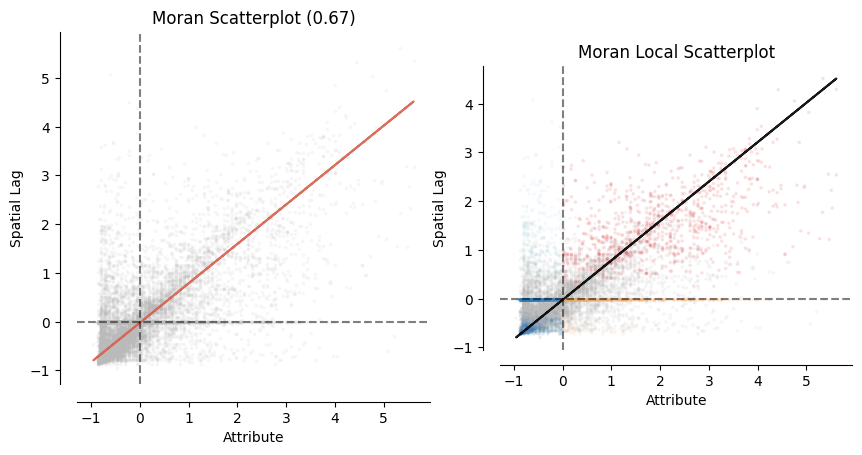

fluoride_value
lag distance of 1.11 kms
# of points with no neighbors within the distance band is 947, which is 8.01% of total values.


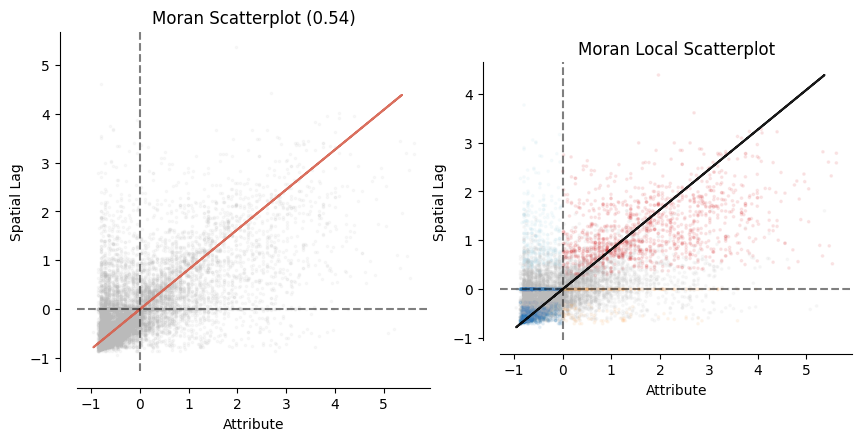

fluoride_value
lag distance of 2.22 kms
# of points with no neighbors within the distance band is 174, which is 1.47% of total values.


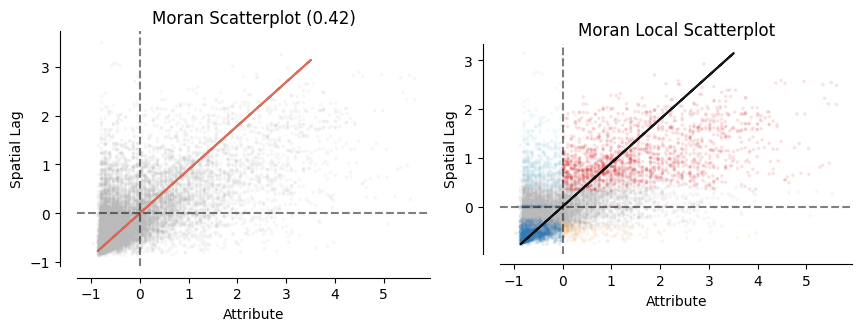

fluoride_value
lag distance of 3.33 kms
# of points with no neighbors within the distance band is 53, which is 0.45% of total values.


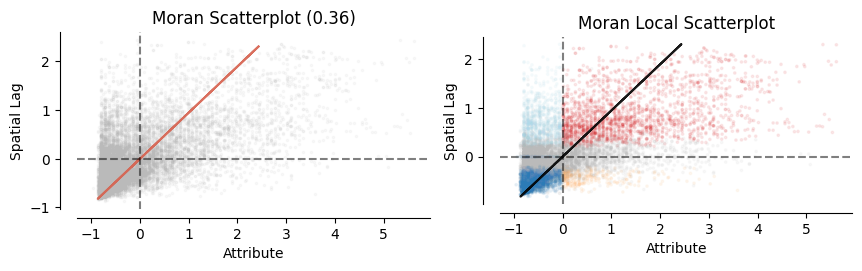

fluoride_value
lag distance of 4.44 kms
# of points with no neighbors within the distance band is 23, which is 0.19% of total values.


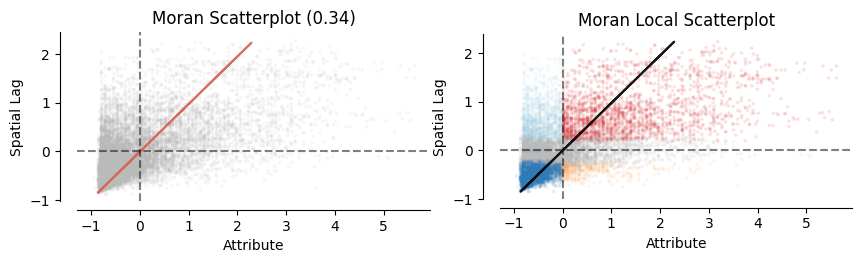

fluoride_value
lag distance of 5.550000000000001 kms
# of points with no neighbors within the distance band is 14, which is 0.12% of total values.


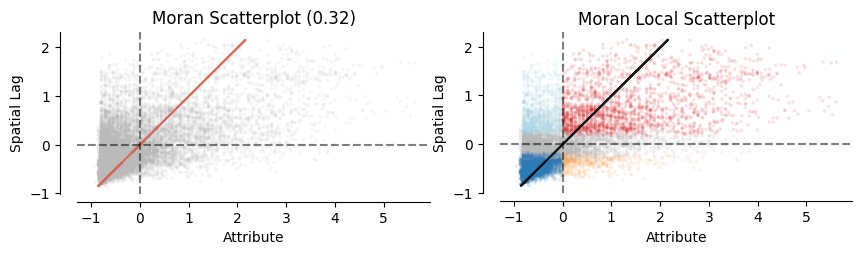

fluoride_value
lag distance of 6.66 kms
# of points with no neighbors within the distance band is 5, which is 0.04% of total values.


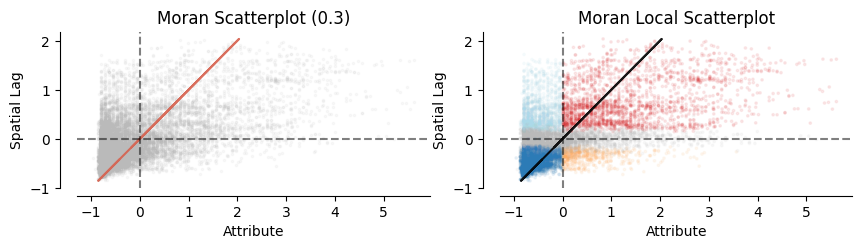

fluoride_value
lag distance of 7.7700000000000005 kms
# of points with no neighbors within the distance band is 5, which is 0.04% of total values.


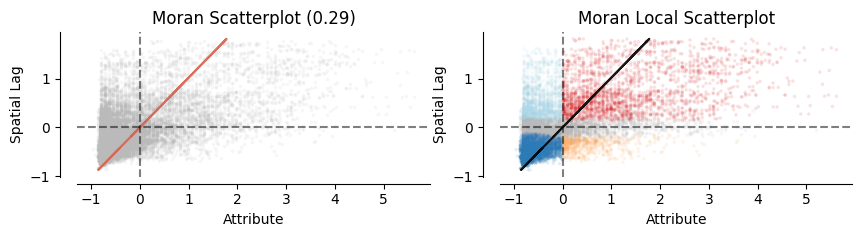

fluoride_value
lag distance of 8.88 kms
# of points with no neighbors within the distance band is 5, which is 0.04% of total values.


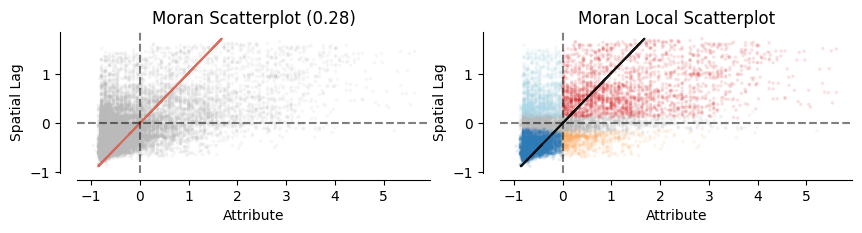

bicarbonate_value
lag distance of 0.555 kms
# of points with no neighbors within the distance band is 2333, which is 19.72% of total values.


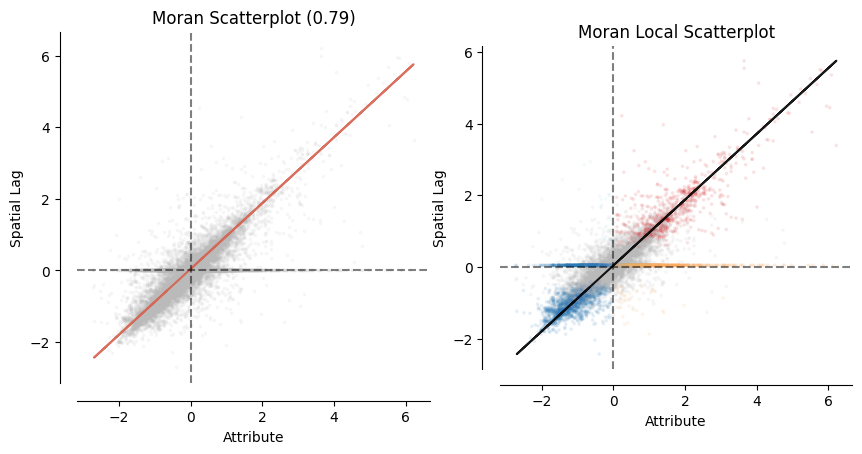

bicarbonate_value
lag distance of 1.11 kms
# of points with no neighbors within the distance band is 947, which is 8.01% of total values.


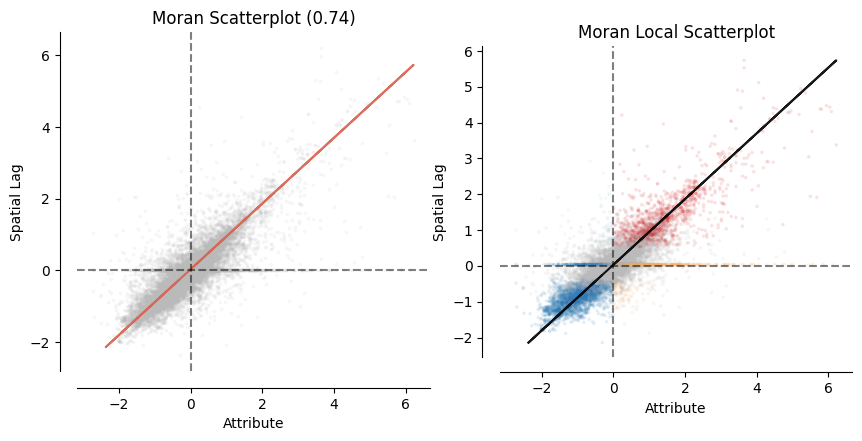

bicarbonate_value
lag distance of 2.22 kms
# of points with no neighbors within the distance band is 174, which is 1.47% of total values.


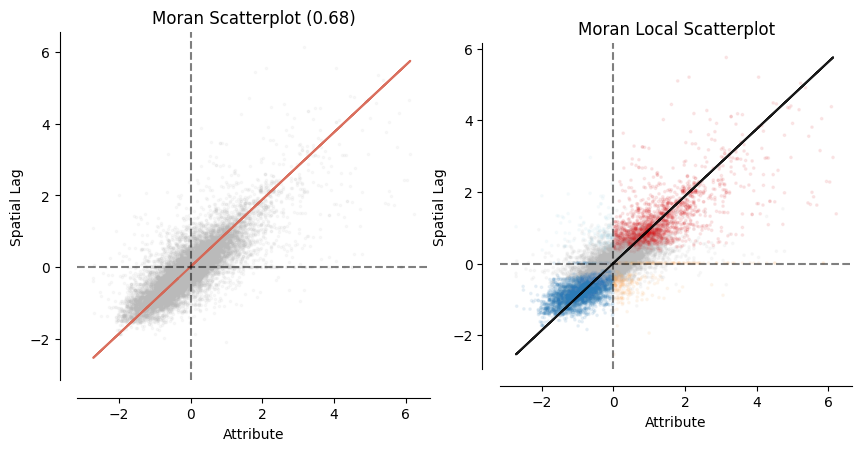

bicarbonate_value
lag distance of 3.33 kms
# of points with no neighbors within the distance band is 53, which is 0.45% of total values.


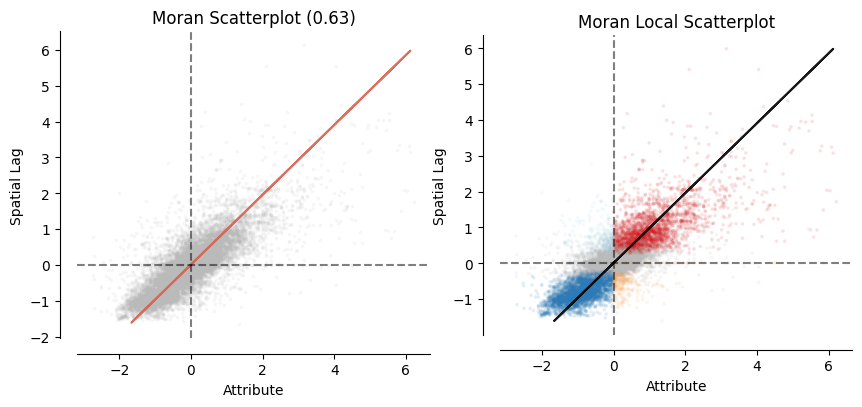

bicarbonate_value
lag distance of 4.44 kms
# of points with no neighbors within the distance band is 23, which is 0.19% of total values.


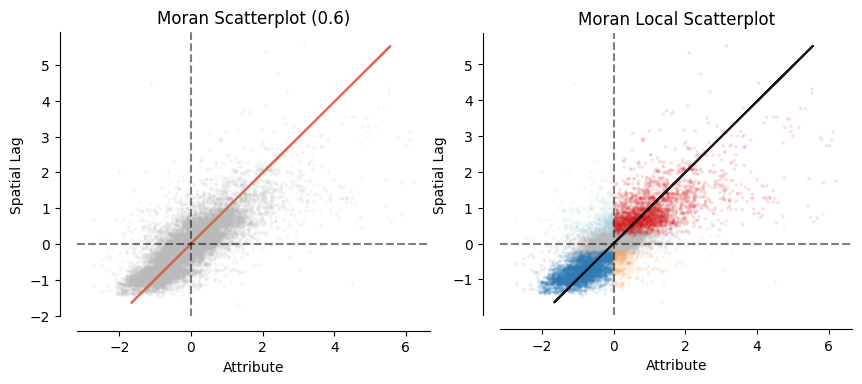

bicarbonate_value
lag distance of 5.550000000000001 kms
# of points with no neighbors within the distance band is 14, which is 0.12% of total values.


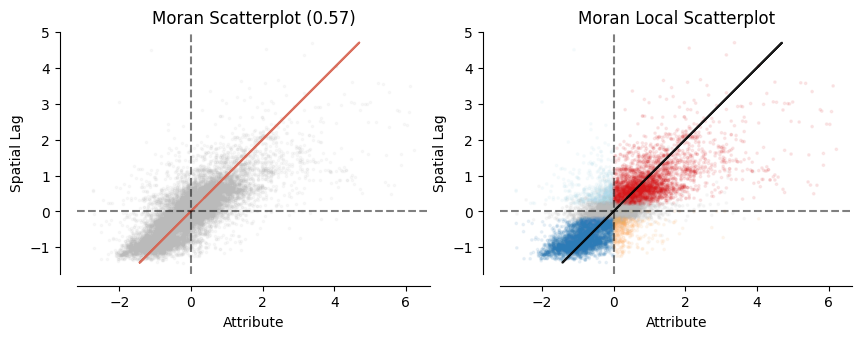

bicarbonate_value
lag distance of 6.66 kms
# of points with no neighbors within the distance band is 5, which is 0.04% of total values.


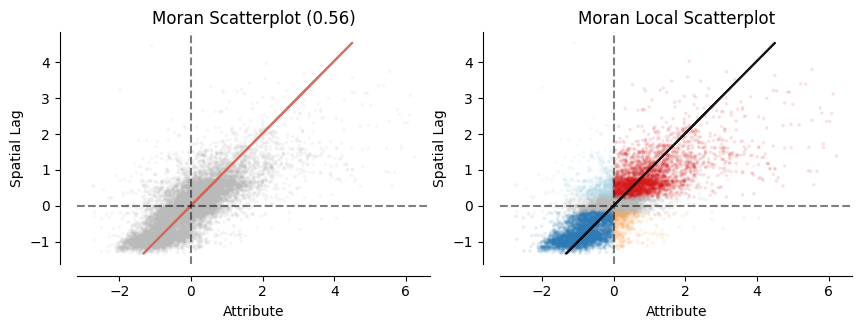

bicarbonate_value
lag distance of 7.7700000000000005 kms
# of points with no neighbors within the distance band is 5, which is 0.04% of total values.


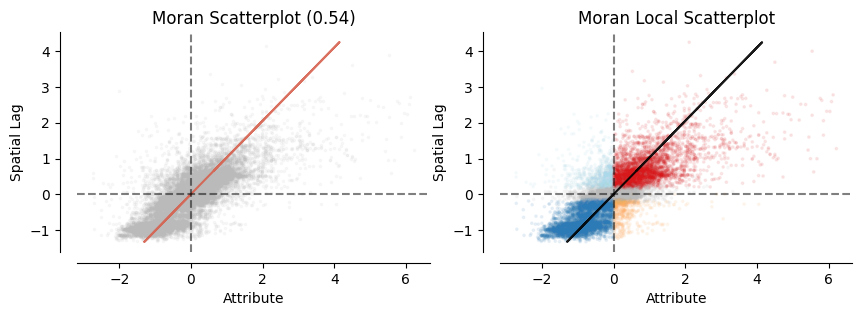

bicarbonate_value
lag distance of 8.88 kms
# of points with no neighbors within the distance band is 5, which is 0.04% of total values.


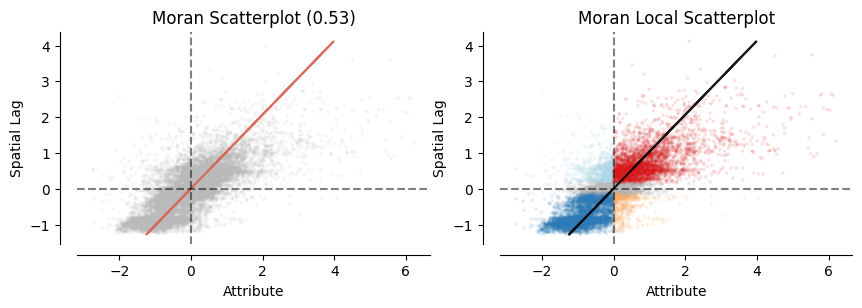

total dissolved solids_value
lag distance of 0.555 kms
# of points with no neighbors within the distance band is 2333, which is 19.72% of total values.


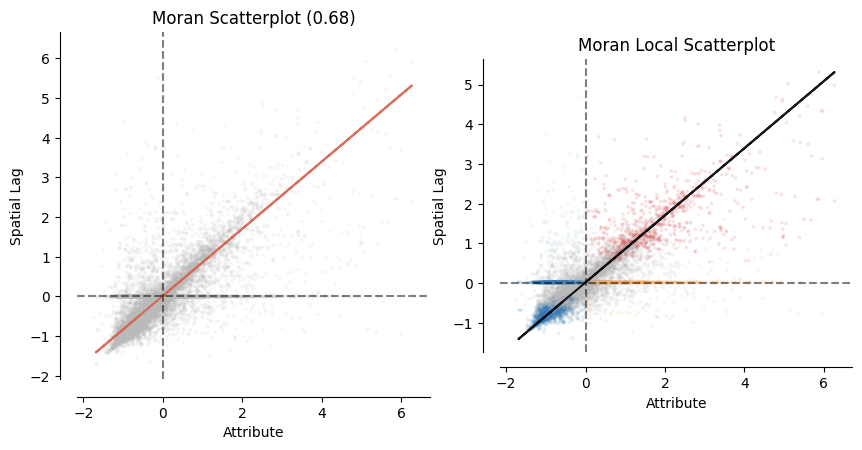

total dissolved solids_value
lag distance of 1.11 kms
# of points with no neighbors within the distance band is 947, which is 8.01% of total values.


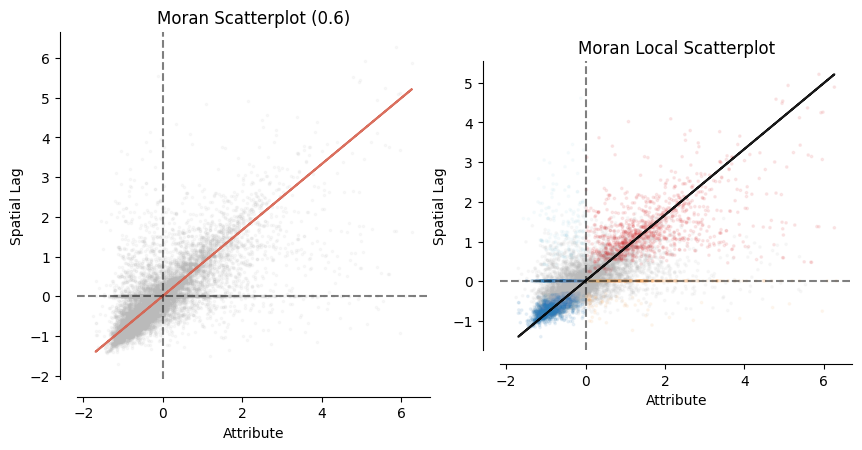

total dissolved solids_value
lag distance of 2.22 kms
# of points with no neighbors within the distance band is 174, which is 1.47% of total values.


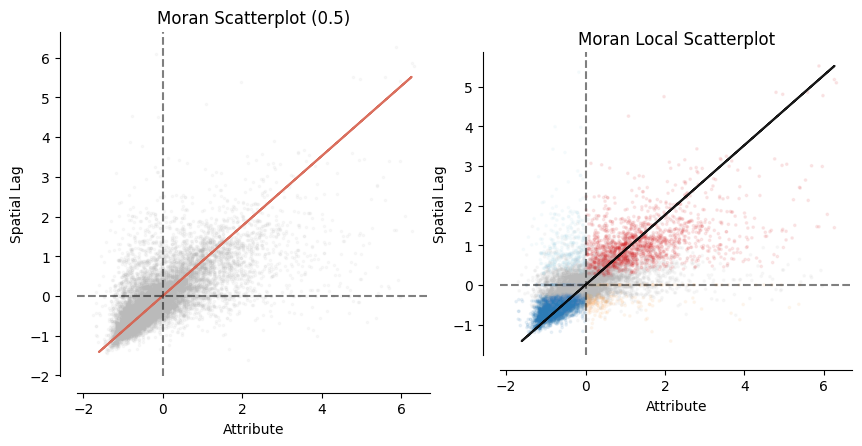

total dissolved solids_value
lag distance of 3.33 kms
# of points with no neighbors within the distance band is 53, which is 0.45% of total values.


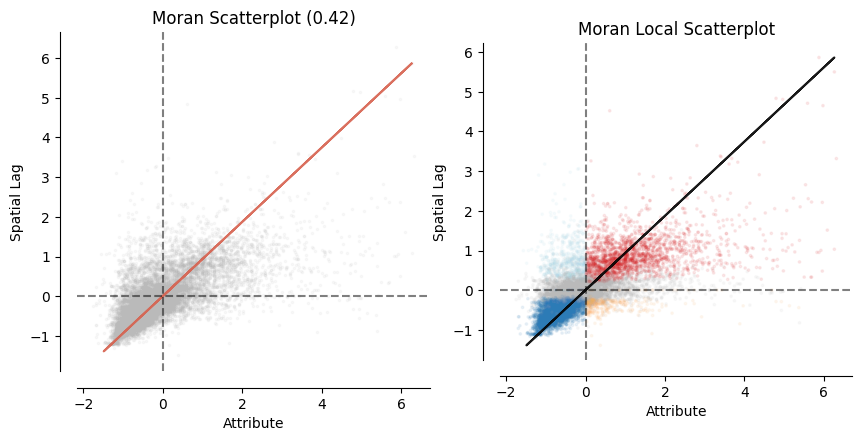

total dissolved solids_value
lag distance of 4.44 kms
# of points with no neighbors within the distance band is 23, which is 0.19% of total values.


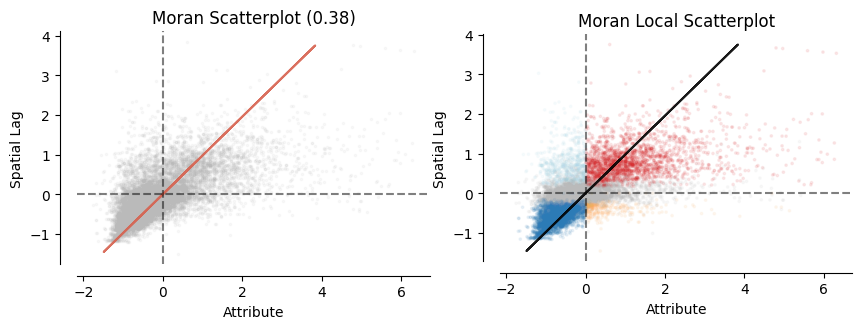

total dissolved solids_value
lag distance of 5.550000000000001 kms
# of points with no neighbors within the distance band is 14, which is 0.12% of total values.


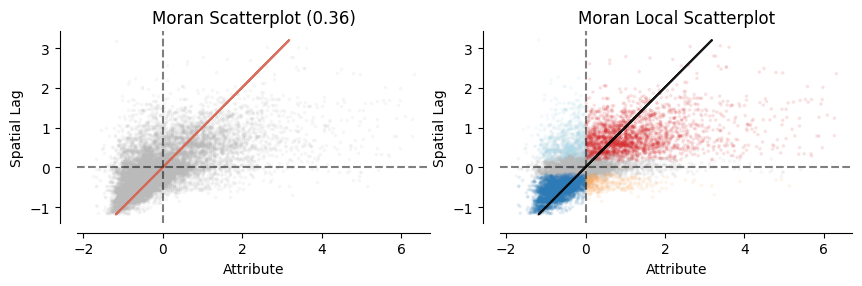

total dissolved solids_value
lag distance of 6.66 kms
# of points with no neighbors within the distance band is 5, which is 0.04% of total values.


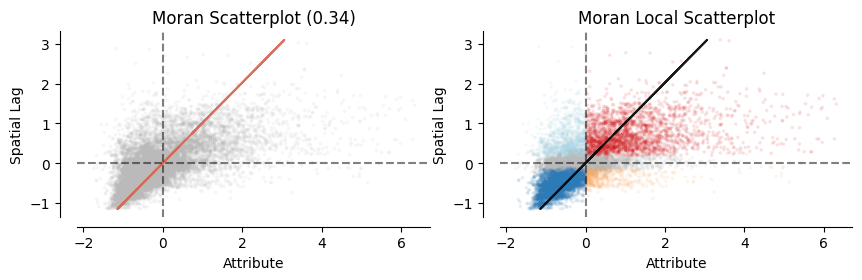

total dissolved solids_value
lag distance of 7.7700000000000005 kms
# of points with no neighbors within the distance band is 5, which is 0.04% of total values.


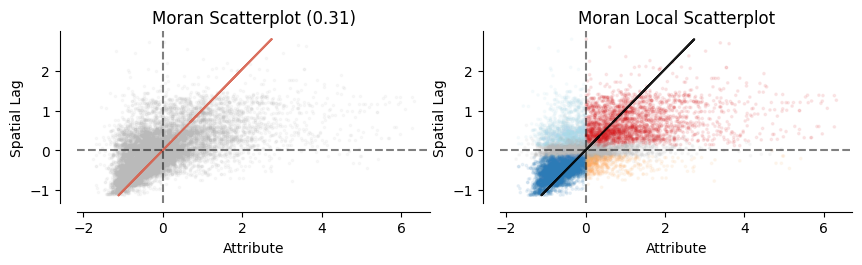

total dissolved solids_value
lag distance of 8.88 kms
# of points with no neighbors within the distance band is 5, which is 0.04% of total values.


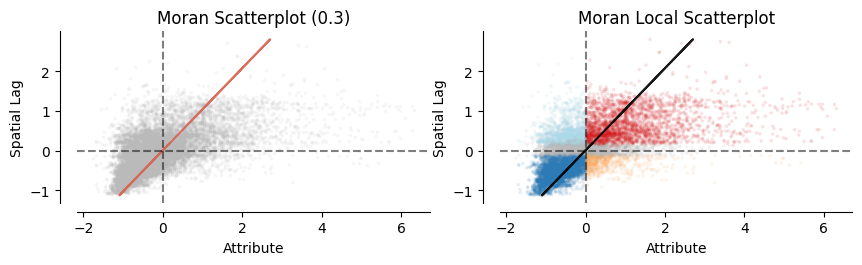

nitrite + nitrate as nitrogen_value
lag distance of 0.555 kms
# of points with no neighbors within the distance band is 2333, which is 19.72% of total values.


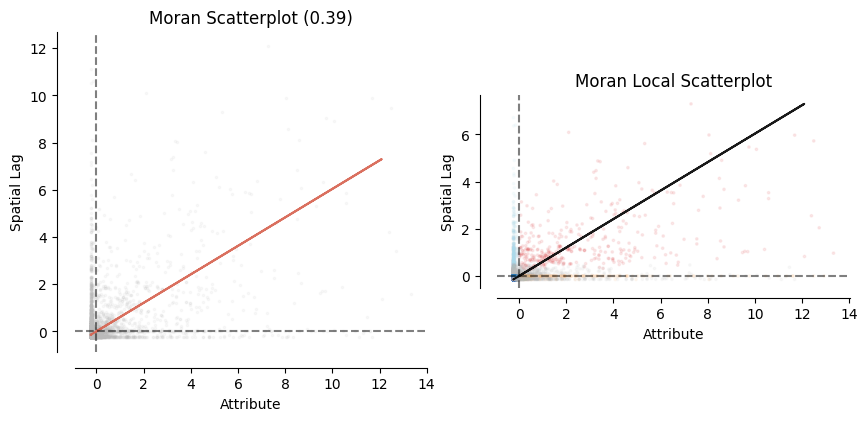

nitrite + nitrate as nitrogen_value
lag distance of 1.11 kms
# of points with no neighbors within the distance band is 947, which is 8.01% of total values.


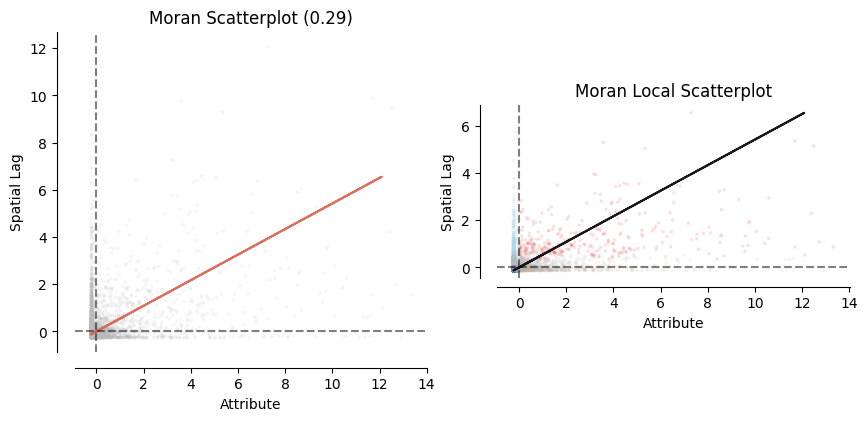

nitrite + nitrate as nitrogen_value
lag distance of 2.22 kms
# of points with no neighbors within the distance band is 174, which is 1.47% of total values.


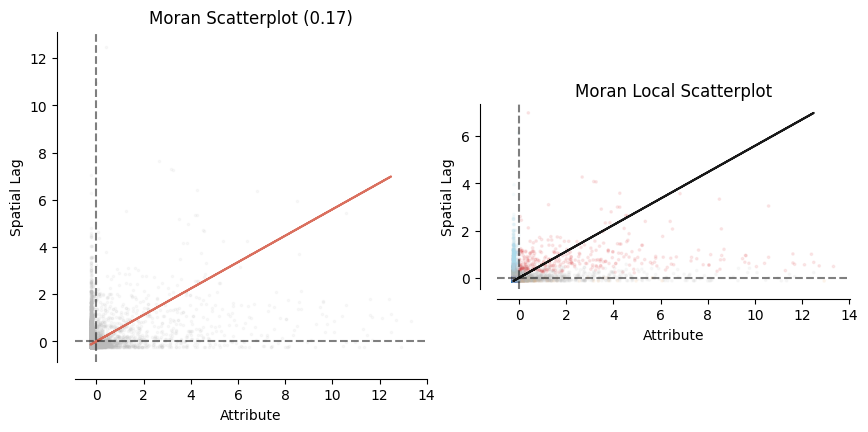

nitrite + nitrate as nitrogen_value
lag distance of 3.33 kms
# of points with no neighbors within the distance band is 53, which is 0.45% of total values.


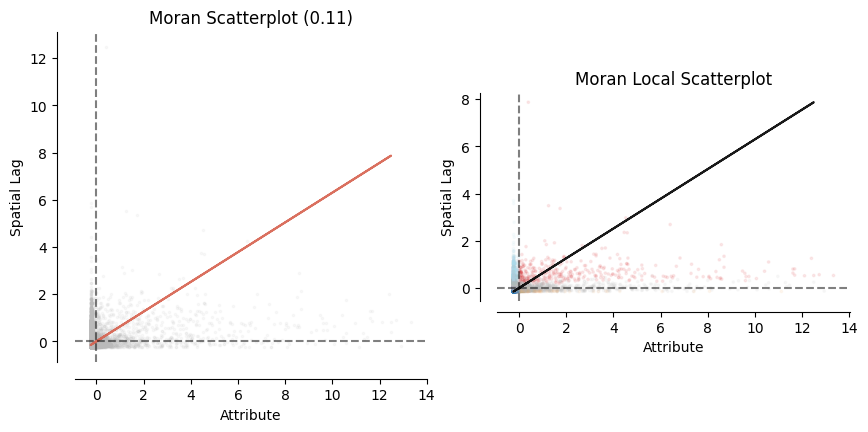

nitrite + nitrate as nitrogen_value
lag distance of 4.44 kms
# of points with no neighbors within the distance band is 23, which is 0.19% of total values.


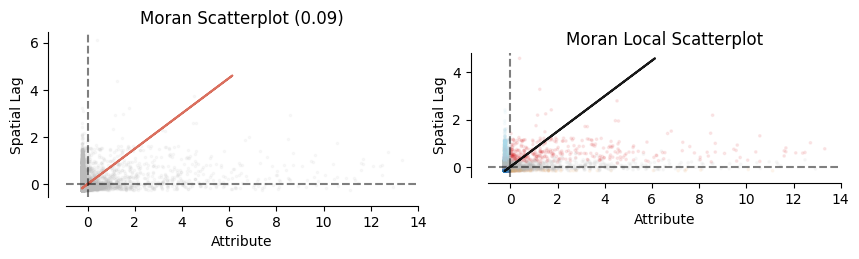

nitrite + nitrate as nitrogen_value
lag distance of 5.550000000000001 kms
# of points with no neighbors within the distance band is 14, which is 0.12% of total values.


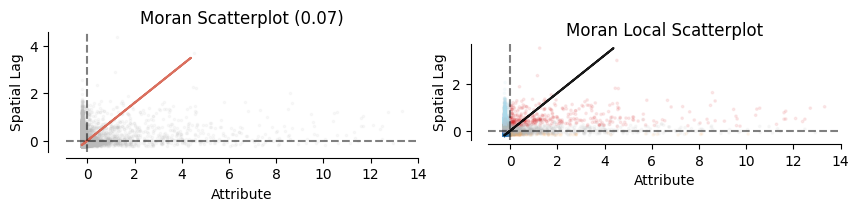

nitrite + nitrate as nitrogen_value
lag distance of 6.66 kms
# of points with no neighbors within the distance band is 5, which is 0.04% of total values.


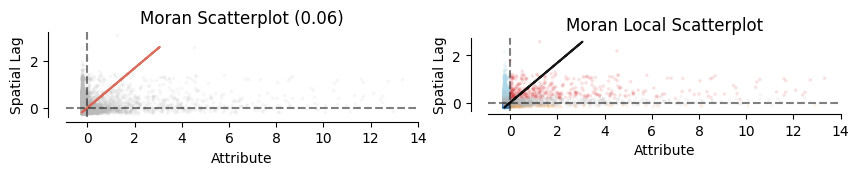

nitrite + nitrate as nitrogen_value
lag distance of 7.7700000000000005 kms
# of points with no neighbors within the distance band is 5, which is 0.04% of total values.


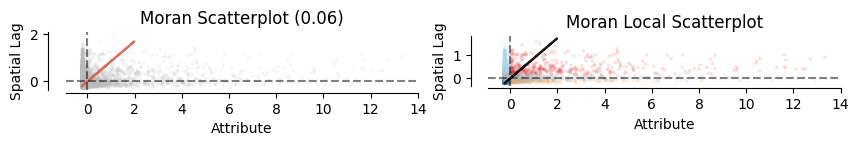

nitrite + nitrate as nitrogen_value
lag distance of 8.88 kms
# of points with no neighbors within the distance band is 5, which is 0.04% of total values.


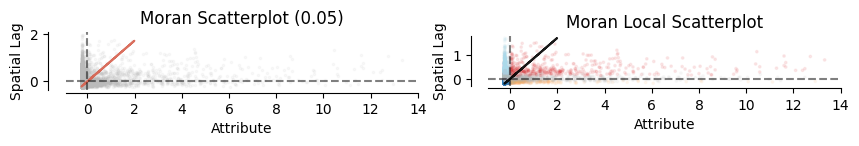

In [4]:
select_water_chemistry_variables = ['fluoride_value','bicarbonate_value','total dissolved solids_value','nitrite + nitrate as nitrogen_value']
lag_distances = [0.005,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08]
from esda.moran import Moran
from splot.esda import moran_scatterplot
import pysal
from pysal.lib import weights
import matplotlib.pyplot as plt
import warnings
n=(gdf_filtered.shape[0])
# Suppress RuntimeWarning
warnings.filterwarnings("ignore", category=RuntimeWarning)

for water_chemistry_variable in select_water_chemistry_variables:
    for lag_distance in lag_distances:
        print(water_chemistry_variable)
        print(f'lag distance of {lag_distance*111} kms')
        w = pysal.lib.weights.DistanceBand.from_dataframe(gdf_filtered, threshold=lag_distance, binary=True,silence_warnings=True)
        print(f"# of points with no neighbors within the distance band is {len(w.islands)}, which is {(len(w.islands)/n):.2%} of total values.")
        y = gdf_filtered[water_chemistry_variable]
        moran = Moran(y, w)
        moran_loc = Moran_Local(y, w)
        fig, axs = plt.subplots(1,2,  figsize=(10,10),
                                subplot_kw={'aspect': 'equal'})
        moran_scatterplot(moran, ax=axs[0],scatter_kwds={'s': 3 ,'alpha': 0.08})
        moran_scatterplot(moran_loc, p=0.05, ax=axs[1],scatter_kwds={'s': 3, 'alpha': 0.08})
        plt.show()



# Make estimates using the spatial lag neighbors used in Moran's calculations


In [8]:
def estimate_values_row(row,df):
    user_point = row['geometry']


    # Define dictionaries for mac_values and ao_values
    mac_values_dict = {
        'nitrite as nitrogen_value': 1,
        'fluoride_value': 1.5,
        'nitrate as nitrogen_value': 10,
        'nitrite + nitrate as nitrogen_value': 10
    }

    ao_values_dict = {
        'manganese_value': 0.05,
        'iron_value': 0.3,
        'iron (total)_value': 0.3,
        'sodium_value': 200,
        'chloride_value': 250,
        'sulphate_value': 500,
        'total dissolved solids_value': 500,
        'ph_value': 8.5
    }

    # Define a dictionary for spatial_autocor_df
    spatial_autocor_dict = {
        'chemistry_variables': {
            0: 'carbonate_value',
            1: 'nitrite as nitrogen_value',
            2: 'nitrate as nitrogen_value',
            3: 'ph_value',
            4: 'bicarbonate_value',
            5: 'total dissolved solids_value',
            6: 'fluoride_value',
            7: 'chloride_value',
            8: 'manganese_value',
            9: 'iron_value',
            10: 'sulphate_value',
            11: 'calcium_value',
            12: 'sodium_value',
            13: 'potassium_value',
            14: 'magnesium_value',
            15: 'iron (total)_value',
            16: 'nitrite + nitrate as nitrogen_value',
            17: 'ionic balance_value'
        },
        'strong_0.5_spatial_auto_cor_dist': {
            0: np.nan,
            1: np.nan,
            2: np.nan,
            3: 0.005,
            4: 0.03,
            5: 0.01,
            6: 0.01,
            7: 0.005,
            8: np.nan,
            9: np.nan,
            10: 0.01,
            11: np.nan,
            12: 0.01,
            13: np.nan,
            14: 0.005,
            15: np.nan,
            16: np.nan,
            17: np.nan}
    }
    distance_0_02_values= {
        'carbonate_value': 0.09876547009291448,
         'nitrite as nitrogen_value': 0.0047187140254194015,
         'nitrate as nitrogen_value': 0.14289133629575798,
         'ph_value': 0.34260775171578656,
         'bicarbonate_value': 0.5472286018001612,
         'total dissolved solids_value': 0.42588344684152746,
         'fluoride_value': 0.4167433922362721,
         'chloride_value': 0.3668874793332898,
         'manganese_value': 0.004664869626844939,
         'iron_value': 0.006608525306043397,
         'sulphate_value': 0.3997537408482819,
         'calcium_value': 0.3029889429029043,
         'sodium_value': 0.4901174654343961,
         'potassium_value': 0.058175563084645575,
         'magnesium_value': 0.3406066016736636,
         'iron (total)_value': 0.00408735695080831,
         'nitrite + nitrate as nitrogen_value': 0.1429966004181208,
         'ionic balance_value': 0.17700291031994483
    }
    # Create a DataFrame from the spatial_autocor_dict
    spatial_autocor_df = pd.DataFrame(spatial_autocor_dict)
    mean_values_strong = {}
    estimate_well_dict = {}
    nearby_wells_strong = set()

    
    chemistry_variables = spatial_autocor_df.loc[spatial_autocor_df['strong_0.5_spatial_auto_cor_dist'] > 0, 'chemistry_variables'].tolist()   

    
    
    df_obs = get_observations_within_0_2_rad(user_point, df)
    n_obs=len(df_obs)
    weighting_factor_pop=1/(n_obs+1)
    weighting_factor_obs=n_obs/(n_obs+1)
    
    
    distances=[]
    
    for geom in df_obs['geometry']:
    
        distance = user_point.distance(geom)
        distances.append(distance)
        
    distance_df = pd.DataFrame(distances, index=df_obs.index, columns=['distance'])
    distance_df = pd.concat([df_obs, distance_df], axis=1)
    distance_df = distance_df.loc[distance_df.loc[:,'distance'] != 0]
    distances.remove(0.0) 

    
    estimate_well_dict={}
    for chemistry_variable in chemistry_variables:
        mean_population = df[chemistry_variable].mean()
        mean_observation = distance_df[chemistry_variable].mean()
        if len(distance_df)>=2:
            min_r=0.000
            #maximum value for distance in radians for normalization 
            max_r=0.023
            normalized_distances = [1-((x - min_r) / (max_r - min_r)) for x in distances]
            chem_vals=distance_df.loc[:,chemistry_variable].values
            

            weighted_average = np.sum(chem_vals * normalized_distances) / np.sum(normalized_distances)
    
            estimate_well_dict[chemistry_variable] = weighted_average 
        else:
            
            estimated_value = (mean_observation *weighting_factor_obs) + (mean_population*weighting_factor_pop) 
            estimate_well_dict[chemistry_variable] = estimated_value           
            
            
        neighbours=len(distance_df)
    return estimate_well_dict,neighbours


In [9]:
#Running this  takes a very long time 10-20min

estimated_values_df = gdf_filtered.copy()

value_columns = [col for col in estimated_values_df.columns if col.endswith('_value')]

# Initialize a DataFrame to store estimated values with NaN values
estimate_values_df = pd.DataFrame(index=estimated_values_df.index)

for col in value_columns:
    est_col = col.replace('_value', '_estimate')
    estimated_values_df[est_col] = None
    
estimated_values_df['num_neighbors'] = None

for index, row in estimated_values_df.iterrows():
    estimate_well_dict,neighbours = estimate_values_row(row, estimated_values_df)
    
    estimated_values_df.at[index,'num_neighbors']=neighbours
    
    for col, value in estimate_well_dict.items():
        est_col = col.replace('_value', '_estimate')
        estimated_values_df.at[index, est_col] = estimated_values_df[col].mean() if value <= 0 else value
# drop rows without any estimates, that is rows without any values within 2km radius of another well
estimated_values_df_full = estimated_values_df.dropna(axis=1, how='all')
estimated_values_df_full = estimated_values_df_full.dropna()

In [10]:
#pickling the variable for easier acccess 
  
with open('est_values_gdf.pkl', 'wb') as file: 

    pickle.dump(estimated_values_df_full, file) 


In [11]:




with open('est_values_gdf.pkl', 'rb') as file: 
      
    # Call load method to deserialze 
    estimated_values_df_full = pickle.load(file) 
  


In [14]:
estimated_values_df_full.head()

geometry  WELL_ID  WELL_TEST_ID  LATTITUDE  \
326  POINT (-112.88422 52.69821)     6674          7133  52.698214   
327  POINT (-112.88359 52.69915)     8310          7539  52.699148   
328  POINT (-112.88377 52.69895)     1329         12410  52.698950   
329  POINT (-112.88516 52.69831)    11476          6563  52.698308   
330  POINT (-112.89909 52.69741)     7101          9842  52.697414   

      LONGITUDE  WQUAL_DETAILS_ID  total alkalinity_value  carbonate_value  \
326 -112.884222           1216687                   676.0              6.0   
327 -112.883589           1216688                   757.0              6.0   
328 -112.883770           1181115                   734.0              6.0   
329 -112.885163           1181111                   490.0              6.0   
330 -112.899090           1216971                   418.0              6.0   

     nitrite as nitrogen_value  nitrate as nitrogen_value  ...  \
326                      0.020                       9.26  ...   
327                      0.020                      47.70  ...   
328                      0.020                       0.94  ...   
329                      0.005                       0.27  ...   
330                      0.005                       0.01  ...   

     ionic balance_value  ph_estimate  bicarbonate_estimate  \
326                107.0     8.148096            748.650772   
327                102.0     8.142734            728.481417   
328                107.0     8.068995            735.168017   
329                 98.0      8.05543            801.472503   
330                102.0     8.172055            679.013432   

     total dissolved solids_estimate  fluoride_estimate  chloride_estimate  \
326                      1637.801352           0.323873          40.645987   
327                      1553.681487           0.445726          26.032888   
328                      1642.009869           0.417311          42.385538   
329                      1848.319822           0.428205          47.022625   
330                       1356.15727           0.528332         100.626537   

     sulphate_estimate  sodium_estimate  magnesium_estimate  num_neighbors  
326         611.946686       540.529363           19.964369              5  
327          596.37408       509.371674           21.171145              5  
328         636.485628        509.04443           34.358693              5  
329         721.318444       592.586713           32.805611              5  
330         406.402329       442.860491           18.454215              6  

[5 rows x 35 columns]

# Linear Regressions and Confusion Matrix using nearby wells 

- Using distance band of 2.2km (has a combination of low island count and moderate to high Moran's I values select features)
- **Values where estimated by taking a weighted average (favouring closeness to the dependant well) of the wells within the 2.2km band, where there was no neighbor population mean was used**

- R-Squared for bicarbonate is good, fluoride and TDS less so 

- However, there is still a useful correlation, for example the model accuratly predicts a well will exceed the maximum allowed concentration of 1.5 mg/L 87% of the time 

- So many values exceed the guidlines for TDS that the confusion matrix is less useful 

- There are no guildines for bicarbonate, but bicarbonate is a component of TDS 



R-squared: 0.6935
RMSE: 121.1090


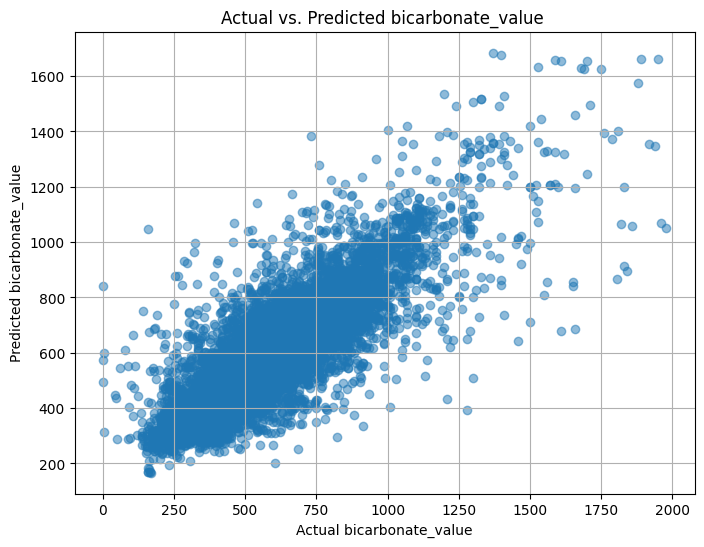

In [21]:
chem_value='bicarbonate_value'
chem_est='bicarbonate_estimate'

def evaluate_and_plot(estimated_values_df_full, chem_value, chem_est, ao_values_dict,mac_values):
    actual_values = estimated_values_df_full[chem_value]
    predicted_values = estimated_values_df_full[chem_est]

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

    # Calculate R-squared
    r_squared = r2_score(actual_values, predicted_values)

    print(f"R-squared: {r_squared:.4f}")
    print(f"RMSE: {rmse:.4f}")

    # Create a scatterplot
    plt.figure(figsize=(8, 6))
    plt.scatter(actual_values, predicted_values, alpha=0.5)
    plt.title(f'Actual vs. Predicted {chem_value} ')
    plt.xlabel(f'Actual {chem_value}')
    plt.ylabel(f'Predicted {chem_value}')
    plt.grid(True)

    # Show the plot
    plt.show()
    if chem_value in ao_values_dict:
        estimated_values_df_full['target'] = (actual_values > ao_values_dict[chem_value]).astype(int)

        # Calculate confusion matrix
        y_true = estimated_values_df_full['target']
        y_pred = (estimated_values_df_full[chem_est] > ao_values_dict[chem_value]).astype(int)
        conf_matrix = confusion_matrix(y_true, y_pred)

        # Calculate metrics
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        accuracy = accuracy_score(y_true, y_pred)
        tn, fp, fn, tp =conf_matrix.ravel()
        print("Confusion Matrix:")
        print(conf_matrix)
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1-score: {f1}")
        print(f"Accuracy: {accuracy}")
    if chem_value in mac_values_dict:
        estimated_values_df_full['target'] = (actual_values > mac_values_dict[chem_value]).astype(int)

        # Calculate confusion matrix
        y_true = estimated_values_df_full['target']
        y_pred = (estimated_values_df_full[chem_est] > mac_values_dict[chem_value]).astype(int)
        conf_matrix = confusion_matrix(y_true, y_pred)

        # Calculate metrics
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        accuracy = accuracy_score(y_true, y_pred)

        tn, fp, fn, tp =conf_matrix.ravel()

        print("Confusion Matrix:")
        print(conf_matrix)
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1-score: {f1}")
        print(f"Accuracy: {accuracy}")
        
    
    
evaluate_and_plot(estimated_values_df_full, chem_value, chem_est, ao_values_dict,mac_values_dict)


R-squared: 0.5039
RMSE: 414.4505


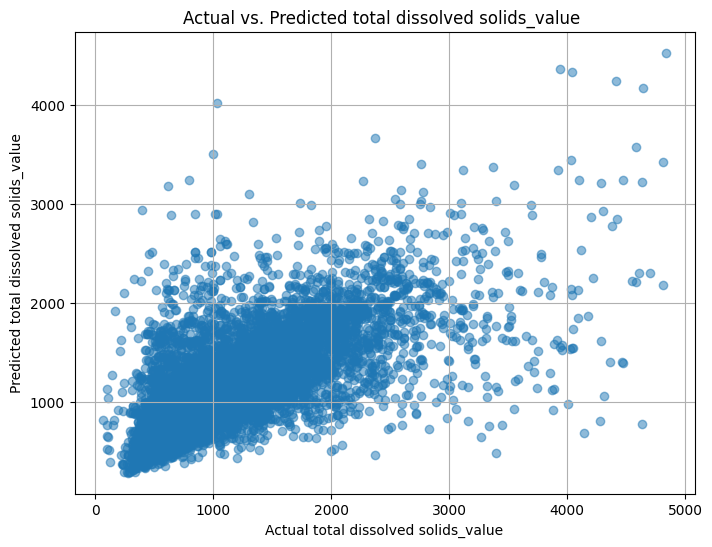

Confusion Matrix:
[[  232   604]
 [   79 10740]]
Precision: 0.9467559943582511
Recall: 0.9926980312413347
F1-score: 0.9691828723548257
Accuracy: 0.9413985413985414


In [23]:
chem_value='total dissolved solids_value'
chem_est='total dissolved solids_estimate'
evaluate_and_plot(estimated_values_df_full, chem_value, chem_est, ao_values_dict,mac_values_dict)

R-squared: 0.4304
RMSE: 0.9337


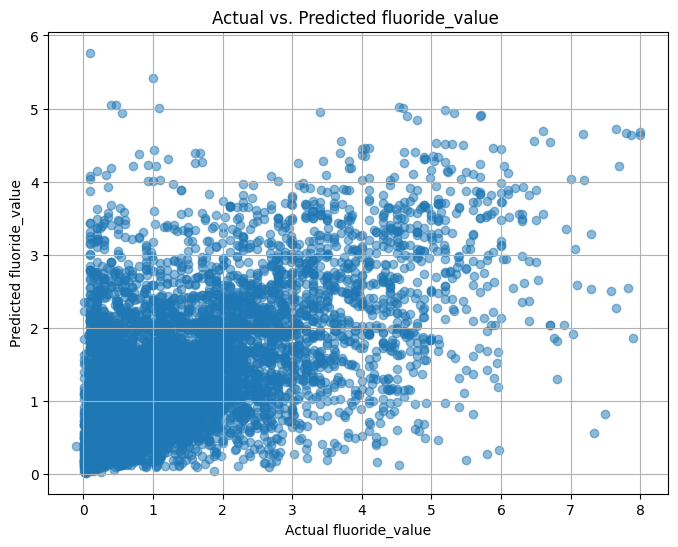

Confusion Matrix:
[[7790 1086]
 [ 982 1797]]
Precision: 0.6233090530697191
Recall: 0.6466354803886291
F1-score: 0.6347580360296715
Accuracy: 0.8225654225654225


In [24]:
chem_value='fluoride_value'
chem_est='fluoride_estimate'
evaluate_and_plot(estimated_values_df_full, chem_value, chem_est, ao_values_dict,mac_values_dict)

# Estimate water quality parameters by location

Here we estimate water quality parameters based on user-defined locations and spatial autocorrelation. Below is a summary of the key functionalities:

1. **Create User Point (`create_user_point`)**:
   - The code prompts the user to input latitude and longitude in decimal degrees.
   - It creates a `Point` object representing the user's location.

2. **Get Observations Within Buffer (`get_observations_within_buffer`)**:
   - Given a user point, buffer distance in kilometers, and a GeoDataFrame (`gdf`), this function calculates a buffer area around the user's location.
   - It identifies observations (wells) from the GeoDataFrame that intersect with the buffer area.
   - The observations within the buffer are returned as a subset of the GeoDataFrame.

3. **Calculate Mean and Estimated Values (`calculate_mean_and_estimated_values`)**:
   - This function takes user latitude, longitude, several data sources, and dictionaries containing Maximum Allowable Concentrations (MAC) and Aesthetic Objective (AO) values for chemistry variables.
   - It calculates mean and estimated values for chemistry variables within defined buffer zones based on spatial autocorrelation thresholds (0.5 and 0.3 Moran's I).
   - For each variable, it calculates both strong (0.5 Moran's I) and weak (0.3 Moran's I) estimates by calculating a weighted "average" combining the mean value within corresponding spatial lag and the median value of the entire dataset
   - It checks if the estimated values exceed MAC or AO values and prints warnings if necessary.
   - The function also tracks nearby wells that contribute to the estimates and stores them in sets.
   - The results are returned as dictionaries and sets containing mean and estimated values, as well as nearby well IDs.

Overall, this code is designed to help users assess water quality estimates for specific locations, considering spatial autocorrelation and predefined thresholds. It calculates estimates for various chemistry variables and checks if they comply with defined standards (MAC and AO). The code provides valuable insights into water quality analysis and allows users to make informed decisions about drinking water safety.

Note: this will not return estimates where the user location does not contain wells within the distance threshold.


In [26]:
def get_nearby_wellids(user_point):
    obs_df = get_observations_within_0_2_rad(user_point, well_analysis_full_geo_disolved_first)
    nearby_well_ids = set(obs_df['WELL_ID'])
    return nearby_well_ids

In [39]:
def estimate_values_user_point(user_point,df):

    # Define dictionaries for mac_values and ao_values
    mac_values_dict = {
        'nitrite as nitrogen_value': 1,
        'fluoride_value': 1.5,
        'nitrate as nitrogen_value': 10,
        'nitrite + nitrate as nitrogen_value': 10
    }

    ao_values_dict = {
        'manganese_value': 0.05,
        'iron_value': 0.3,
        'iron (total)_value': 0.3,
        'sodium_value': 200,
        'chloride_value': 250,
        'sulphate_value': 500,
        'total dissolved solids_value': 500,
        'ph_value': 8.5
    }

    # Define a dictionary for spatial_autocor_df
    spatial_autocor_dict = {
        'chemistry_variables': {
            0: 'carbonate_value',
            1: 'nitrite as nitrogen_value',
            2: 'nitrate as nitrogen_value',
            3: 'ph_value',
            4: 'bicarbonate_value',
            5: 'total dissolved solids_value',
            6: 'fluoride_value',
            7: 'chloride_value',
            8: 'manganese_value',
            9: 'iron_value',
            10: 'sulphate_value',
            11: 'calcium_value',
            12: 'sodium_value',
            13: 'potassium_value',
            14: 'magnesium_value',
            15: 'iron (total)_value',
            16: 'nitrite + nitrate as nitrogen_value',
            17: 'ionic balance_value'
        },
        'strong_0.5_spatial_auto_cor_dist': {
            0: np.nan,
            1: np.nan,
            2: np.nan,
            3: 0.005,
            4: 0.03,
            5: 0.01,
            6: 0.01,
            7: 0.005,
            8: np.nan,
            9: np.nan,
            10: 0.01,
            11: np.nan,
            12: 0.01,
            13: np.nan,
            14: 0.005,
            15: np.nan,
            16: np.nan,
            17: np.nan
        },
        'weak_0.3_spatial_auto_cor_dist': {
            0: np.nan,
            1: np.nan,
            2: np.nan,
            3: 0.005,
            4: 0.03,
            5: 0.01,
            6: 0.01,
            7: 0.005,
            8: np.nan,
            9: np.nan,
            10: 0.01,
            11: np.nan,
            12: 0.01,
            13: np.nan,
            14: 0.005,
            15: np.nan,
            16: np.nan,
            17: np.nan
        }
    }
    distance_0_02_values= {
        'carbonate_value': 0.09876547009291448,
         'nitrite as nitrogen_value': 0.0047187140254194015,
         'nitrate as nitrogen_value': 0.14289133629575798,
         'ph_value': 0.34260775171578656,
         'bicarbonate_value': 0.5472286018001612,
         'total dissolved solids_value': 0.42588344684152746,
         'fluoride_value': 0.4167433922362721,
         'chloride_value': 0.3668874793332898,
         'manganese_value': 0.004664869626844939,
         'iron_value': 0.006608525306043397,
         'sulphate_value': 0.3997537408482819,
         'calcium_value': 0.3029889429029043,
         'sodium_value': 0.4901174654343961,
         'potassium_value': 0.058175563084645575,
         'magnesium_value': 0.3406066016736636,
         'iron (total)_value': 0.00408735695080831,
         'nitrite + nitrate as nitrogen_value': 0.1429966004181208,
         'ionic balance_value': 0.17700291031994483
    }
    # Create a DataFrame from the spatial_autocor_dict
    spatial_autocor_df = pd.DataFrame(spatial_autocor_dict)
    mean_values_strong = {}
    estimate_well_dict = {}
    nearby_wells_strong = set()

    
    chemistry_variables = spatial_autocor_df.loc[spatial_autocor_df['strong_0.5_spatial_auto_cor_dist'] > 0, 'chemistry_variables'].tolist()   

    km_buffer = 2.2264
    
    
    df_obs = get_observations_within_0_2_rad(user_point, df)
    n_obs=len(df_obs)
    weighting_factor_pop=1/(n_obs+1)
    weighting_factor_obs=n_obs/(n_obs+1)
    
    
    distances=[]
    
    for geom in df_obs['geometry']:
    
        distance = user_point.distance(geom)
        distances.append(distance)
        
    distance_df = pd.DataFrame(distances, index=df_obs.index, columns=['distance'])
    distance_df = pd.concat([df_obs, distance_df], axis=1)
    distance_df = distance_df.loc[distance_df.loc[:,'distance'] != 0]

    
    estimate_well_dict={}
    for chemistry_variable in chemistry_variables:
        mean_population = df[chemistry_variable].mean()
        mean_observation = distance_df[chemistry_variable].mean()
        if len(distance_df)>=1:
            min_r=0.000
            #maximum value for distance in radians for normalization 
            max_r=0.023
            normalized_distances = [1-((x - min_r) / (max_r - min_r)) for x in distances]
            chem_vals=distance_df.loc[:,chemistry_variable].values
            

            weighted_average = np.sum(chem_vals * normalized_distances) / np.sum(normalized_distances)
    
            estimate_well_dict[chemistry_variable] = weighted_average 
        else:
            
            estimated_value = (mean_observation *weighting_factor_obs) + (mean_population*weighting_factor_pop) 
            estimate_well_dict[chemistry_variable] = estimated_value           
            
            
        neighbours=len(distance_df)
    return estimate_well_dict,neighbours


In [28]:

def get_geo_df(well_analysis_full_geo_disolved_first, nearby_wells_strong):
    # Get observations by well ID
    geo_df = get_observations_by_well_id(well_analysis_full_geo_disolved_first, nearby_wells_strong)
    
    # Reset the index for enumeration later
    geo_df = geo_df.reset_index(drop=True)
    
    # Create a latitude-longitude list
    geo_df_list = make_latlong_list(geo_df)
    
    return geo_df, geo_df_list  # Return both the processed DataFrame and the list


In [29]:
def print_non_nan_key_value_pairs(data_dict):
    found_non_nan = False  # Initialize a flag to track if any non-NaN values were found
    
    for key, value in data_dict.items():
        if not pd.isna(value):
            found_non_nan = True
            print(f"{key}: {value:.2f}")  # Format the value to 2 decimal places
    
    if not found_non_nan:
        print("No wells found within bounds")


In [5]:
def get_observations_within_0_2_rad(user_point,gdf):
    
    buffer_distance_km = (0.02)
    buffered_point = user_point.buffer(buffer_distance_km )  # Approximate conversion from degrees to kilometers (111.32 km per degree of latitude)

    observations_within_buffer = gdf[gdf.geometry.intersects(buffered_point)]
    
    return observations_within_buffer

In [33]:
def create_user_point():
    user_lat = float(input("Enter latitude (in decimal degrees): "))
    user_lon = float(input("Enter longitude (in decimal degrees): "))

    user_point = Point(user_lon, user_lat)
    
    return user_point

def get_observations_within_buffer(user_point,buffer_distance_km,gdf):
    
    buffered_point = user_point.buffer(buffer_distance_km / 111.32)  # Approximate conversion from degrees to kilometers (111.32 km per degree of latitude)

    observations_within_buffer = well_analysis_full_geo_disolved_first[gdf.geometry.intersects(buffered_point)]
    
    return observations_within_buffer




def make_latlong_list(observations_within_buffer):
        geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in observations_within_buffer.geometry]
        
        return geo_df_list


def generate_random_coordinates():
    '''Generates random coordinates as a tuple, for an area 210km by 178km  NW 
    of Calgary and SW of Edmonton. Chosen for dense well coverage '''
    # Define the boundaries
    min_lat = 50.8  # Minimum latitude for Alberta
    max_lat = 52.7  # Maximum latitude for Alberta
    min_lon = -113.9  # Minimum longitude for Alberta
    max_lon = -112.3  # Maximum longitude for Alberta

    # Generate random latitude and longitude within Alberta's boundaries
    random_lat = random.uniform(min_lat, max_lat)
    random_lon = random.uniform(min_lon, max_lon)

    return random_lat, random_lon

    



In [30]:
def get_observations_by_well_id(dataframe, well_id_set):
    """
    Get observations from a DataFrame based on a set of WELL_ID values.

    Args:
        dataframe (pandas.DataFrame): The DataFrame containing observations.
        well_id_set (set): A set of WELL_ID values to filter by.

    Returns:
        pandas.DataFrame: Subset of the input DataFrame with observations matching WELL_ID values.
    """
    observations_matching_well_id = dataframe[dataframe['WELL_ID'].isin(well_id_set)]
    return observations_matching_well_id


In [31]:
def map_nearby_wells(random_coordinates, geo_df_list, ao_values_dict, mac_values_dict, est_dict):
    # Create a map centered at the given random_coordinates
    map = folium.Map(location=[random_coordinates[0], random_coordinates[1]], tiles="Cartodb Positron", zoom_start=13)

    # Define marker sizes and opacities as a list of tuples
    marker_sizes_opacities = [(2220, 0.4)]

    # Iterate through marker sizes and add circles with varying sizes and opacities
    for cor_radius in marker_sizes_opacities:
        folium.Circle(
            location=[random_coordinates[0], random_coordinates[1]],
            radius=cor_radius[0],
            color='blue',
            opacity=0.01,  # Adjust the overall circle opacity
            fill=True,
            fill_opacity=cor_radius[1],  # Use opacity from the list
            fill_color='yellow',
            popup='2220m'
        ).add_to(map)

    # Define the columns to be displayed in the popups, must br in well_id, ao, then mac otherwise will not display right

    popup_columns = list(ao_values_dict.keys())+list(mac_values_dict.keys())
    popup_columns.insert(0, 'WELL_ID')
    # Iterate through geo_df_list to add markers with popups
    for i, coordinates in enumerate(geo_df_list):
        type_color = "blue"
        popup_content = f'<div style="white-space: nowrap;">{popup_columns[0]}: {geo_df[popup_columns[0]][i]}</div>'
        ao_counter = 1
        mac_counter = 1


        # Check if columns are above Aesthetic Objective (AO) or Maximum Allowable Concentration (MAC)
        for element in popup_columns:
            if element in ao_values_dict and geo_df[element][i] > ao_values_dict[element]:
                if ao_counter == 1:
                    popup_content += f'<div style="white-space: nowrap;">ABOVE AESTHETIC OBJECTIVE:</div>'
                
                popup_content += f'<div style="white-space: nowrap;">{element}: {geo_df[element][i]}</div>'
                ao_counter -= 1

            if element in mac_values_dict and geo_df[element][i] > mac_values_dict[element]:
                if mac_counter == 1:
                    popup_content += f'<div style="white-space: nowrap;">EXCEEDS MAXIMUM ALLOWABLE CONCENTRATION:</div>'
                
                popup_content += f'<div style="white-space: nowrap;">{element}: {geo_df[element][i]}</div>'
                mac_counter -= 1
        if mac_counter < 1:
            type_color = "red"
        if ao_counter < 1 and mac_counter == 1:
            type_color = "orange"
        if ao_counter == 1 and mac_counter == 1 :
            type_color = "blue"
        # Add a marker with the determined type_color and popup content
        folium.Marker(
            location=coordinates,
            popup=popup_content,
            icon=folium.Icon(color=type_color, icon='arrow-up-from-ground-water', prefix='fa'),
        ).add_to(map)

    # Add a black marker at random_coordinates


    
    folium.Marker(
        location=[random_coordinates[0], random_coordinates[1]],
        icon=folium.Icon(color='black', icon='bore-hole', prefix='fa'),
        popup=f'{est_dict}'
    ).add_to(map)
    
    est_dict_list = [[key, value] for key, value in est_dict.items()]
    est_dict_table=tabulate(est_dict_list)
    print('Estimated Values:')
    print(tabulate(est_dict_list))

    return map  # Return the created map

# Return estimates for a random potential well location

In [67]:
random_coordinates = generate_random_coordinates()


print("Random Coordinates:", random_coordinates,'\n')
# assign user_point to the random coodinates 

user_point=Point(random_coordinates[1], random_coordinates[0])

est_dict,neighbours=estimate_values_user_point(user_point,gdf_filtered)
    



nearby_wells=get_nearby_wellids(user_point)

# Define a function to create a map with circles and markers
# Define the text you want to display in the "text box"


geo_df =get_observations_by_well_id(well_analysis_full_geo_disolved_first,nearby_wells)
geo_df = geo_df.reset_index(drop=True) #must reset index for enumeration later
geo_df_list=make_latlong_list(geo_df)

if est_dict['fluoride_value']>1.5:
    print("****WARNING RISK OF HIGH FLUORIDE CONCENTRATION*****")

# Create a map with circles and markers using the defined function
map = map_nearby_wells(random_coordinates, geo_df_list, ao_values_dict, mac_values_dict,est_dict)

# Display the map
map.save("index.html")  # You can save the map to an HTML file for viewing in a web browser
map


Random Coordinates: (52.05764099656002, -113.64592321005308) 

Estimated Values:
----------------------------  ---------
ph_value                        7.9661
bicarbonate_value             576.15
total dissolved solids_value  667.582
fluoride_value                  0.32483
chloride_value                  1.63727
sulphate_value                144.528
sodium_value                   97.5049
magnesium_value                34.8272
----------------------------  ---------


# Return Estimates for an area of known high fluoride concentrations

In [48]:

fluoride_coordinates = (51.061922,-113.48345) # area with high fluoride concentrations
print("Random Coordinates:", fluoride_coordinates,'\n')
# assign user_point to the random coodinates 

user_point=Point(fluoride_coordinates[1], fluoride_coordinates[0])

est_dict,neighbours=estimate_values_user_point(user_point,gdf_filtered)



nearby_wells=get_nearby_wellids(user_point)

# Define a function to create a map with circles and markers
# Define the text you want to display in the "text box"


geo_df =get_observations_by_well_id(well_analysis_full_geo_disolved_first,nearby_wells)
geo_df = geo_df.reset_index(drop=True) #must reset index for enumeration later
geo_df_list=make_latlong_list(geo_df)

if est_dict['fluoride_value']>1.5:
    print("****WARNING RISK OF HIGH FLUORIDE CONCENTRATION*****")

# Create a map with circles and markers using the defined function
map = map_nearby_wells(fluoride_coordinates, geo_df_list, ao_values_dict, mac_values_dict,est_dict)

# Display the map
map.save("index.html")  # You can save the map to an HTML file for viewing in a web browser
map

Random Coordinates: (51.061922, -113.48345) 

****WARNING RISK OF HIGH FLUORIDE LEVELS*****
Estimated Values:
----------------------------  ----------
ph_value                        8.76957
bicarbonate_value             289.823
total dissolved solids_value  846.153
fluoride_value                  4.89478
chloride_value                 49.9678
sulphate_value                327.11
sodium_value                  295.657
magnesium_value                 0.503446
----------------------------  ----------


In [ ]:
random_coordinates = generate_random_coordinates()

#random_coordinates = (51.061922,-113.49445) # area with high fluoride concentrations
print("Random Coordinates:", random_coordinates,'\n')
# assign user_point to the random coodinates 

user_point=Point(random_coordinates[1], random_coordinates[0])

est_dict=estimate_values(user_point)
est_dict.keys()

In [ ]:
gdf_filtered['fluoride_value'].hist()

In [ ]:
gdf_filtered['bicarbonate_value'].hist()

In [ ]:

gdf_filtered['nitrite + nitrate as nitrogen_value'].hist()

In [ ]:
gdf_filtered['total dissolved solids_value'].hist()

# Create a dataframe of distances bands for Moran's I spatial autocorrelation statistic 

### STEPS

1. **Setting Maximum Allowable Concentrations**: Another list, `chemistry_variables_mac_list`, is defined, containing chemistry variables for which maximum allowable concentrations (MAC) are specified, along with the corresponding MAC values. This is from the Goverment of Canada guidelines https://www.canada.ca/en/health-canada/services/environmental-workplace-health/reports-publications/water-quality/guidelines-canadian-drinking-water-quality-summary-table.html

2. **Setting Aesthetic Objective Values**: A list of chemistry variables, `chemistry_variables_ao_list`, is provided for which aesthetic objective (AO) values are defined in a dictionary named `ao_values_dict`. This is also from the Goverment of Canada guidelines

3. **Calculating Moran's I Values**: The code includes a dictionary named `variable_morans_I`, which contains Moran's I statistics calculated for each chemistry variable at different lag distances. The Moran's I values are stored in nested dictionaries under the key `'moran_distance_values'`. This dictionary was pre-calculated elsewhere 

4. **Finding Highest Lag Distances Above Threshold**: The code defines a function, `find_highest_lag_distances_above_threshold`, which identifies the highest lag distance for each chemistry variable where the Moran's I value is above a specified threshold. The results are stored in a dictionary named `highest_lag_distances`.

5. **Finding Lowest Lag Distances Above Threshold**: A similar function, `find_lowest_lag_distances_above_threshold`, identifies the lowest lag distance for each chemistry variable where the Moran's I value is above a specified threshold. The results are stored in a dictionary named `lowest_lag_distances`.

6. **Threshold Analysis**: The code analyzes Moran's I statistics for two different threshold values (0.5 and 0.3). It prints the highest lag distances above these thresholds for each chemistry variable and updates a dataframe named `spatial_autocor_df` with the corresponding lag distances for each variable.

With this table we can see at what distances these variables exhibit strong or weak spatial autocorrelation, which can be valuable for further analysis and decision-making


In [27]:
#Initialize a df containing the max distances in radians where each chemistry variable has a 0.5 (strong) and 0.3 (weak) spatial autocorrelation. 
%run get_spatial_autocor_df.py

#return the moran's I values for each parameter at a distance of 0.02 radians
distance_0_02_values = {}

for key, value in variable_morans_I.items():
    moran_distance_values = value.get('moran_distance_values')
    if moran_distance_values:
        distance_0_02_values[key] = moran_distance_values.get(0.02)

distance_0_02_values

strong_0_2_values = {key: value for key, value in distance_0_02_values.items() if value >= 0.4}
